## Assignment on Preprocessing 
####                                                                                                                                                               Submitted By: <font color='blue'>ATHIRA PRAKASH</font>
Do the following on titanic dataset
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

###  1.Load the dataset into python environment

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_data=pd.read_csv(r"D:\DSA\data\titanic_dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  2.Make ‘PassengerId’ as the index column

In [3]:
titanic_data.set_index('PassengerId',inplace=True)


In [4]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  3.Check the basic details of the dataset

In [5]:
titanic_data.shape

(891, 11)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Insights:
          There are 891 rows and 11 coloumns
                                                                                                     
                                                                                                     
        Out of those 11 coloumn there are float 4 are of int and 5 are of object dtypes
        
        Columns Age,Embarked and Cabin have some missing values
       
Each column represents one feature of our data. The PassengerId is a consecutive number identifying each row. Survived is the indicator on whether the passenger survived (0 = No, 1 = Yes). Pclass is the ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Then we have self-explanatory Name, Sex, and Age.

SibSp denotes the number of this passenger's siblings or spouses aboard the Titanic. Parch denotes the number of this passenger's parents or children aboard the Titanic.

Then, there are the Fare the passenger paid, the Cabin number and the port of embarkation (embarked) (C = Cherbourg, Q = Queenstown, S = Southampton).

Our data has different types. There is numerical data, such as the Age, SibSp, Parch, and the Fare. There is categorial data. Some of the categories are represented by numbers (Survived, Pclass). Some are represented by text (Sex and Embarked). And there is textual data (Name, Ticket, and Cabin).

This is quite a mess. For a computer. Furthermore, when having another look at the result oftitanic_data.info(), you can see that the counts vary for different columns. While we have 891 values for most columns, we only have 714 for Age, 204 for Cabin, and 889 for Embarked.

### 4.Fill in all the missing values present in all the columns in the dataset

In [8]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
freqgraph = titanic_data.select_dtypes(include=['float','object','int'])

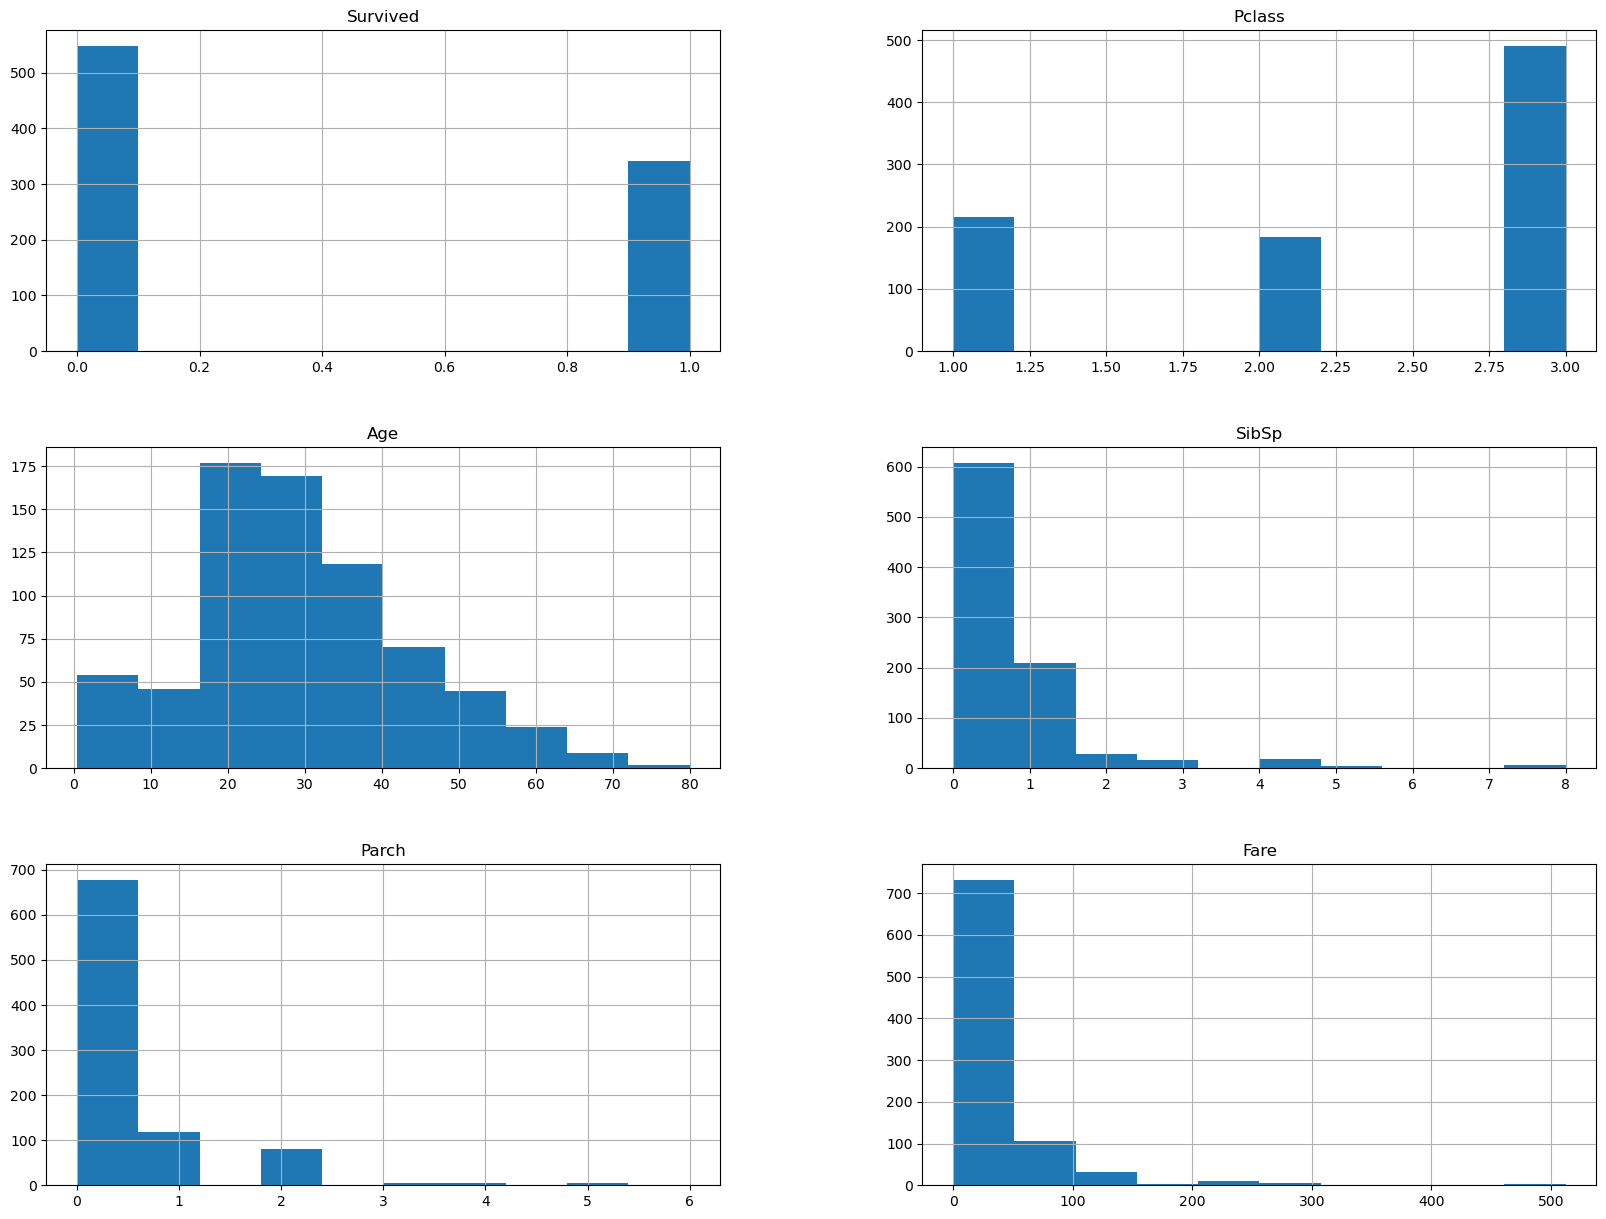

In [10]:
freqgraph.hist(figsize=(20,15));

In [11]:
titanic_data['Age'].fillna(round(titanic_data['Age'].mean(),1),inplace=True)
titanic_data["Cabin"].fillna(value='Not Known',inplace=True)
#titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

######  Insights:
Missing values in Age and Embarked columns are filled with average and mode.Cabin  column's missing values are filled with "Not known"

### 5.Check and handle outliers in at least 3 columns in the dataset

In [13]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
columns = ['Age', 'SibSp','Fare' ]

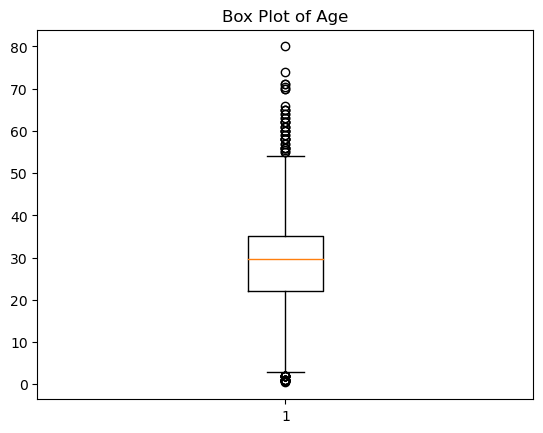

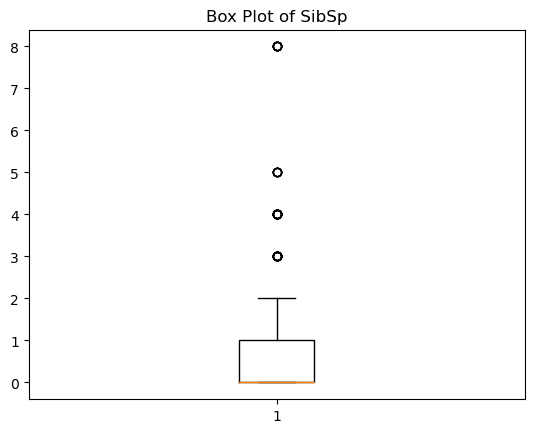

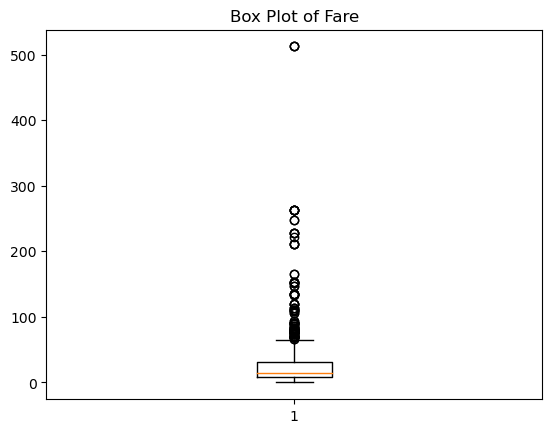

In [15]:
for col in columns:
    plt.figure()
    plt.boxplot(titanic_data[col]);
    plt.title("Box Plot of "+col)

####  Outlier handling Of Age

In [16]:
Q1=np.percentile(titanic_data['Age'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Age'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.5
54.5


In [17]:
outlier=[]
for x in titanic_data['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
titanic_data['Age']=np.where(titanic_data['Age']>upp_lim,upp_lim,np.where(titanic_data['Age']<low_lim,low_lim,titanic_data['Age']))

Text(0.5, 1.0, 'box plot of Age')

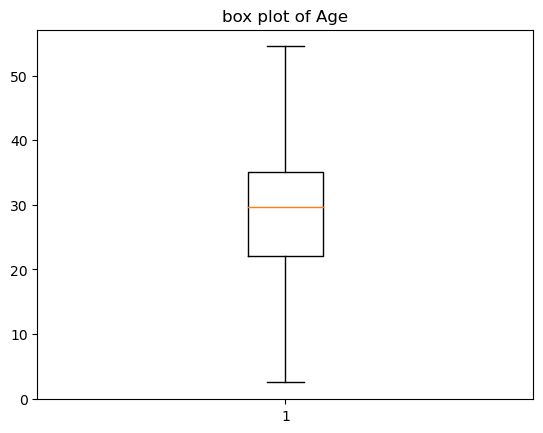

In [18]:
plt.boxplot(titanic_data['Age'])
plt.title('box plot of Age')

####  Outlier handling Of SibSp

In [19]:
Q1=np.percentile(titanic_data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-1.5
2.5


In [20]:
outlier=[]
for x in titanic_data['SibSp']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
titanic_data['SibSp']=np.where(titanic_data['SibSp']>upp_lim,upp_lim,np.where(titanic_data['SibSp']<low_lim,low_lim,titanic_data['SibSp']))


Text(0.5, 1.0, 'box plot of SibSp')

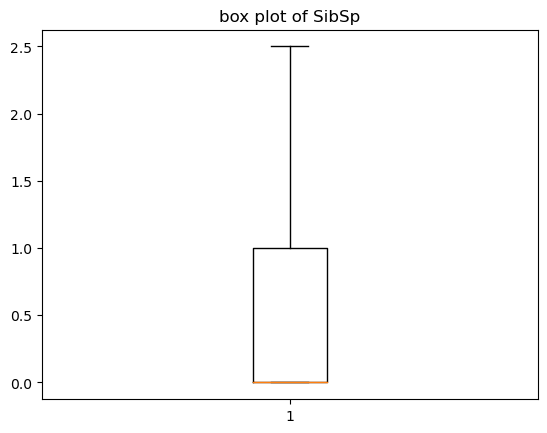

In [21]:
plt.boxplot(titanic_data['SibSp'])
plt.title('box plot of SibSp')

####  Outlier handling Of Fare

In [22]:
Q1=np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-26.724
65.6344


In [23]:
outlier=[]
for x in titanic_data['Fare']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
titanic_data['Fare']=np.where(titanic_data['Fare']>upp_lim,upp_lim,np.where(titanic_data['Fare']<low_lim,low_lim,titanic_data['Fare']))

Text(0.5, 1.0, 'box plot of Fare')

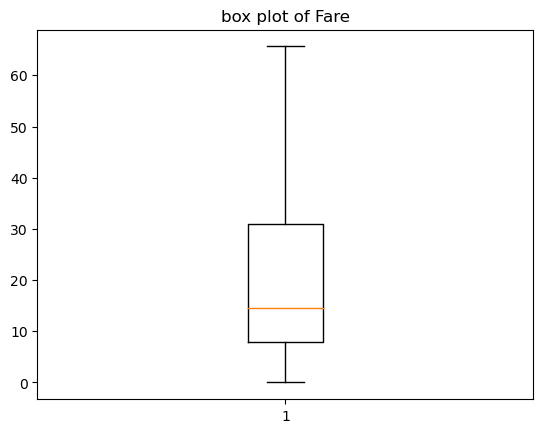

In [24]:
plt.boxplot(titanic_data['Fare'])
plt.title('box plot of Fare')

### 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [25]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(titanic_data[col])
   
    titanic_data[col] = le.transform(titanic_data[col])
titanic_data.head()

   
     


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,Not Known,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,Not Known,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,Not Known,2


In [34]:
x = titanic_data[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
                 

In [35]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1.0,0,7.2500,2
2,1,0,38.0,1.0,0,65.6344,0
3,3,0,26.0,0.0,0,7.9250,2
4,1,0,35.0,1.0,0,53.1000,2
5,3,1,35.0,0.0,0,8.0500,2


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    le.fit(x[col])
    x[col] = le.transform(x[col])
    
    
             
            
x.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_344\1644014173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.transform(x[col])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1.0,0,7.2500,2
2,1,0,38.0,1.0,0,65.6344,0
3,3,0,26.0,0.0,0,7.9250,2
4,1,0,35.0,1.0,0,53.1000,2
5,3,1,35.0,0.0,0,8.0500,2


In [38]:
 from sklearn.preprocessing import MinMaxScaler


In [39]:
scaler = MinMaxScaler()


In [40]:
scaler.fit(x)

MinMaxScaler()

In [41]:
x = scaler.transform(x)

In [42]:
x =pd.DataFrame(x,columns=['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked'])

In [43]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.516865,0.170595,0.063599,0.366375,0.768238
std,0.418036,0.477990,0.231962,0.283298,0.134343,0.312056,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.375000,0.000000,0.000000,0.120522,0.500000
50%,1.000000,1.000000,0.523077,0.000000,0.000000,0.220223,1.000000
75%,1.000000,1.000000,0.625000,0.400000,0.000000,0.472313,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.4,0.0,0.110460,1.0
1,0.0,0.0,0.682692,0.4,0.0,1.000000,0.0
2,1.0,0.0,0.451923,0.0,0.0,0.120745,1.0
3,0.0,0.0,0.625000,0.4,0.0,0.809027,1.0
4,1.0,1.0,0.625000,0.0,0.0,0.122649,1.0
